In [9]:

import pandas as pd                  
import numpy as np                   
import matplotlib.pyplot as plt      
import seaborn as sns                
from sklearn.linear_model import LinearRegression   
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  


In [10]:
df = pd.read_csv(r"temperatures.csv")


In [11]:
print(df.head())

   YEAR    JAN    FEB    MAR    APR    MAY    JUN    JUL    AUG    SEP    OCT  \
0  1901  22.40  24.14  29.07  31.91  33.41  33.18  31.21  30.39  30.47  29.97   
1  1902  24.93  26.58  29.77  31.78  33.73  32.91  30.92  30.73  29.80  29.12   
2  1903  23.44  25.03  27.83  31.39  32.91  33.00  31.34  29.98  29.85  29.04   
3  1904  22.50  24.73  28.21  32.02  32.64  32.07  30.36  30.09  30.04  29.20   
4  1905  22.00  22.83  26.68  30.01  33.32  33.25  31.44  30.68  30.12  30.67   

     NOV    DEC  ANNUAL  JAN-FEB  MAR-MAY  JUN-SEP  OCT-DEC  
0  27.31  24.49   28.96    23.27    31.46    31.27    27.25  
1  26.31  24.04   29.22    25.75    31.76    31.09    26.49  
2  26.08  23.65   28.47    24.24    30.71    30.92    26.26  
3  26.36  23.63   28.49    23.62    30.95    30.66    26.40  
4  27.52  23.82   28.30    22.25    30.00    31.33    26.57  


In [12]:
print(df.columns)


Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')


In [13]:
model = LinearRegression()

In [14]:

import pandas as pd
df = pd.read_csv(r"temperatures.csv")
month_columns = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
df_long = pd.melt(df, id_vars=['YEAR'], value_vars=month_columns, 
                  var_name='Month', value_name='Temperature')

month_mapping = {'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4, 
                 'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8, 
                 'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12}
df_long['Month_num'] = df_long['Month'].map(month_mapping)

X = df_long[['Month_num']].values
y = df_long['Temperature'].values


In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


In [16]:
# Calculate performance metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Print the performance metrics
print("\nModel Performance Metrics:")
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-Squared (R²):", r2)



Model Performance Metrics:
Mean Squared Error (MSE): 10.138413546423767
Mean Absolute Error (MAE): 2.6878642126576593
R-Squared (R²): 0.001971797874375514


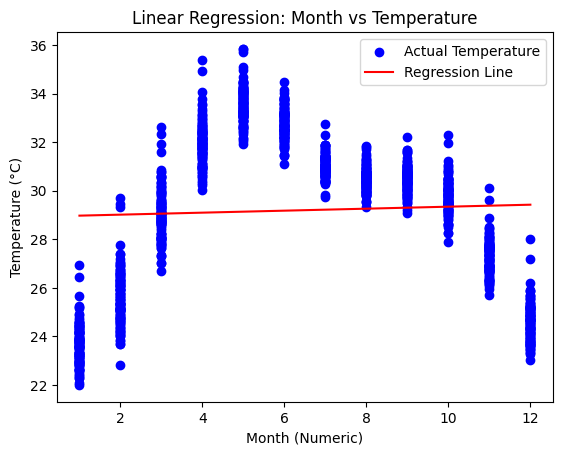

In [17]:

plt.scatter(X, y, color='blue', label='Actual Temperature')

plt.plot(X, y_pred, color='red', label='Regression Line')

plt.xlabel('Month (Numeric)')
plt.ylabel('Temperature (°C)')
plt.title('Linear Regression: Month vs Temperature')

plt.legend()
plt.show()
